In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (257)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (396)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (313)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (168)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (386)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (543)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (152)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (200)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (204)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (142)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fres

In [2]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
train_data_path='/kaggle/input/cotton-disease-dataset/Cotton Disease/train'
validation_data_path='/kaggle/input/cotton-disease-dataset/Cotton Disease/val'

In [4]:
def plotImages(image_arr):
    fig,axes=plt.subplots(1,5,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')

Found 1951 images belonging to 4 classes.


In [6]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [7]:
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 253 images belonging to 4 classes.


In [8]:
model_path = '/kaggle/working//cotton plant disease prediction/v3_red_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [9]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

In [10]:
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/100


2023-10-03 17:30:22.850152: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


61/61 [==============================] - ETA: 0s - loss: 1.2601 - accuracy: 0.4331
Epoch 1: val_accuracy improved from -inf to 0.46245, saving model to /kaggle/working//cotton plant disease prediction/v3_red_cott_dis.h5
61/61 [==============================] - 49s 592ms/step - loss: 1.2601 - accuracy: 0.4331 - val_loss: 1.1426 - val_accuracy: 0.4625
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 1.0550 - accuracy: 0.5469
Epoch 2: val_accuracy improved from 0.46245 to 0.67984, saving model to /kaggle/working//cotton plant disease prediction/v3_red_cott_dis.h5
61/61 [==============================] - 19s 306ms/step - loss: 1.0550 - accuracy: 0.5469 - val_loss: 0.8892 - val_accuracy: 0.6798
Epoch 3/100
61/61 [==============================] - ETA: 0s - loss: 0.9443 - accuracy: 0.6202
Epoch 3: val_accuracy did not improve from 0.67984
61/61 [==============================] - 18s 296ms/step - loss: 0.9443 - accuracy: 0.6202 - val_loss: 1.0842 - val_accuracy: 0.4901
Epo

In [13]:
model_path2 = '/kaggle/working//cotton plant disease prediction/v4_1_cott_dis.h5'
cnn_model.save(model_path2)

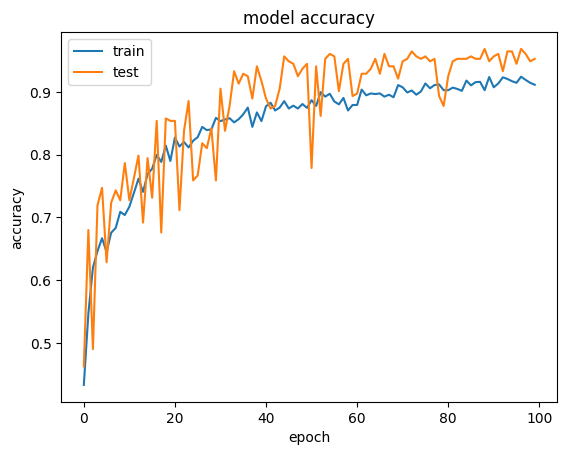

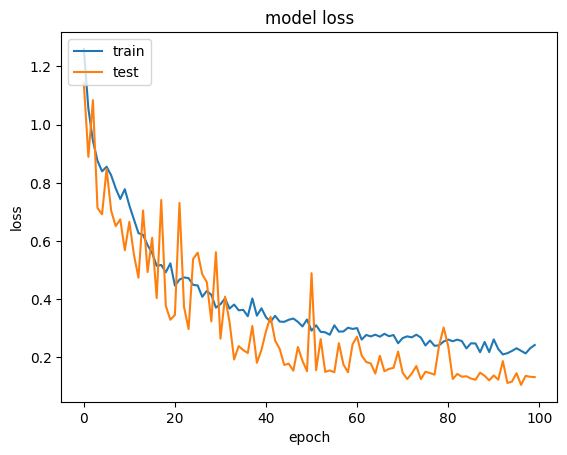

{'loss': [1.260085940361023,
  1.054993987083435,
  0.9443254470825195,
  0.875918447971344,
  0.8395442366600037,
  0.8553488254547119,
  0.8258541822433472,
  0.7812020778656006,
  0.7443883419036865,
  0.7781253457069397,
  0.7220828533172607,
  0.6743136048316956,
  0.627055287361145,
  0.6212955117225647,
  0.5860090255737305,
  0.5590014457702637,
  0.5144965052604675,
  0.5178983807563782,
  0.4925563931465149,
  0.5234068632125854,
  0.4467303454875946,
  0.46748846769332886,
  0.4750223755836487,
  0.4725589156150818,
  0.44935742020606995,
  0.4474606215953827,
  0.40836092829704285,
  0.4284433126449585,
  0.41536471247673035,
  0.3712533414363861,
  0.38307100534439087,
  0.4027549922466278,
  0.3679942786693573,
  0.38188108801841736,
  0.3620697855949402,
  0.36357077956199646,
  0.3416746258735657,
  0.4028785526752472,
  0.3436186611652374,
  0.3689931631088257,
  0.3380777835845947,
  0.32283568382263184,
  0.3430847227573395,
  0.32336053252220154,
  0.322404503822326

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history

In [ ]:
/kaggle/working/cotton plant disease prediction